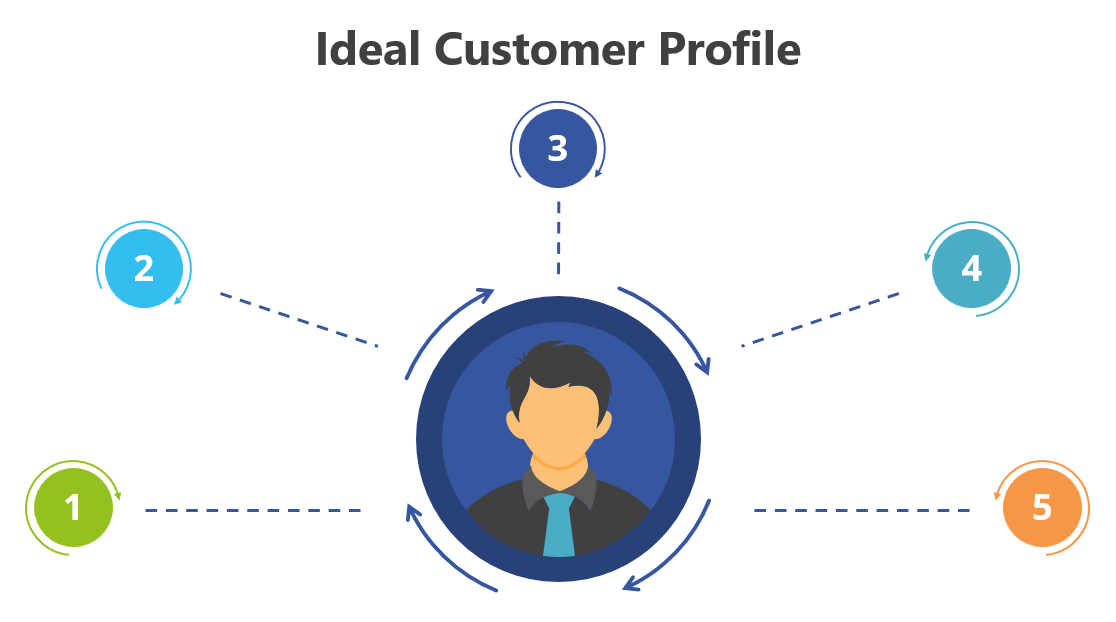

### Ideal Customer Profile

<div style="padding:10px">
An ideal customer profile is a description of the ideal or target customer for a business, product, or service. It represents the characteristics, behaviors, and preferences of the customers who are most likely to buy and benefit from the offering, and who can provide the highest value and loyalty to the business.

The ideal customer profile typically includes a range of demographic, psychographic, and behavioral factors, such as age, gender, income, education, location, interests, values, and purchase history. It may also include more specific criteria such as job title, industry, company size, or other relevant attributes depending on the nature of the business and the offering.
</div>

#### Similarity Analysis
Similarity analysis in customer ideal profile involves identifying similarities or patterns among different customer segments based on their characteristics, behaviors, and preferences. This analysis can help businesses identify common traits and needs among their target audience, and develop more effective marketing, product development, and customer engagement strategies.



### Table of Contents 
1. Seed Creation 
2. Seed Propagation 
3. Similiarity Analysis with Euclidean Distance


In [1]:
import pandas as pd
import numpy as np

In [2]:
Icp_data=pd.read_csv('Ideal Customer Profile - Bank Personal Loan Modelling.csv')

In [3]:
Icp_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
#lets check our data columns
Icp_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
Icp_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
# Declare which variables are important to us.
Feature_variables=['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage']
Target_variable=['Personal Loan']

In [7]:
# import our packages 
from sklearn.preprocessing import StandardScaler
data_to_scale = Icp_data[Feature_variables]
# Create a scaler object
scaler = StandardScaler()
# Fit and transform the selected columns using the scaler object
scaled_data = scaler.fit_transform(data_to_scale)
# Convert the scaled data back to a pandas DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=Feature_variables)
# Combine the scaled columns with the 'personal_loan' column
scaled_df['Personal Loan'] = Icp_data['Personal Loan']
scaled_df['ID'] = Icp_data['ID']

In [8]:
scaled_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,ID
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,0,1
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,0,2
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,0,3
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,0,4
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,0,5


### Seeds Identification
Seeds in ideal customer profile refer to the customers who represent the most ideal or desirable characteristics for a business, product, or service. These customers are typically identified based on their behaviors, preferences, and demographics, and are used as a starting point or "seed" for developing an ideal customer profile.

Identifying seed customers involves analyzing customer data and identifying the customers who are most loyal, valuable, and satisfied with the business, product, or service. These customers typically share similar characteristics and behaviors, such as demographics, purchase history, product usage, and engagement with the business. They may also have similar needs, values, and preferences, which can be used to further refine the ideal customer profile.

<strong>Whats a Seed in ICP?</strong>

Seeds in ideal customer profile are important because they provide a clear picture of the type of customers that a business should be targeting, and help to ensure that marketing and sales efforts are focused on the most promising and profitable customer segments.

In [9]:
Seed_data=scaled_df[scaled_df['Personal Loan']==1].reset_index(drop=True)
Prospect_data=scaled_df[scaled_df['Personal Loan']==0].reset_index(drop=True)
#Prospect_data.reset_index()
Seed_data.reset_index()

,index,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,ID
0,0,-0.989215,-0.968413,2.307795,-1.216855,3.984049,1.332484,-0.555524,1,10
1,1,-0.640236,-0.532371,1.221527,1.397414,1.580593,1.332484,0.762030,1,17
2,2,0.057721,0.078086,2.590225,-0.345432,3.526248,1.332484,-0.555524,1,19
3,3,-0.640236,-0.619580,0.982547,-1.216855,0.779442,0.141703,-0.555524,1,30
4,4,-0.291258,-0.183538,1.460506,0.525991,1.752269,1.332484,-0.555524,1,39
...,...,...,...,...,...,...,...,...,...,...
475,475,-0.640236,-0.619580,1.199801,0.525991,1.237243,1.332484,-0.555524,1,4884
476,476,-0.204013,-0.096330,1.025998,-1.216855,-0.708412,0.141703,-0.555524,1,4928
477,477,-1.512683,-1.404454,0.830470,-0.345432,-0.193385,0.141703,-0.555524,1,4942
478,478,0.057721,-0.009122,1.047724,0.525991,0.607766,1.332484,-0.555524,1,4963


In [10]:
Prospect_data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,ID
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,0,1
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,0,2
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,0,3
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,0,4
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,0,5
...,...,...,...,...,...,...,...,...,...
4515,-1.425438,-1.491662,-0.733757,-1.216855,-0.021710,1.332484,-0.555524,0,4996
4516,-1.338194,-1.404454,-1.276892,1.397414,-0.880087,-1.049078,0.280238,0,4997
4517,1.540880,1.647835,-1.081363,-0.345432,-0.937312,1.332484,-0.555524,0,4998
4518,1.715370,1.735043,-0.538229,0.525991,-0.822862,0.141703,-0.555524,0,4999


### Single Seed Propogation

In [11]:
seed=Seed_data[:1]
seed

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,ID
0,-0.989215,-0.968413,2.307795,-1.216855,3.984049,1.332484,-0.555524,1,10


In [12]:
#lets check the who is our seed 
Icp_data[Icp_data['ID']==10]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


### Euclidean Distance
Euclidean distance is a common distance metric used in similarity analysis to measure the similarity between two data points. It is defined as the square root of the sum of squared differences between the corresponding features of the two points.

Here is the formula to calculate the Euclidean distance between two points, X and Y, each with n features:
d(X,Y) = sqrt((X1-Y1)^2 + (X2-Y2)^2 + ... + (Xn-Yn)^2)

Where X1, X2, ..., Xn represent the feature values of point X, and Y1, Y2, ..., Yn represent the feature values of point Y.

In [13]:
from scipy.spatial.distance import euclidean
distance_metric=[]
for i in range(len(Prospect_data)):
    # assuming X and Y are your two datasets
        distance = euclidean(Prospect_data[Feature_variables][i:i+1], 
                             seed[Feature_variables])
        distance_metric.append(distance)

In [14]:
Prospect_data['Distance']=distance_metric

In [15]:
#Top 20 prospects for our outreach 
Prospect_data.sort_values('Distance')[0:20]


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,ID,Distance
2648,-1.076460,-1.055621,2.351246,-1.216855,3.812373,-1.049078,-0.555524,0,2953,2.391320
557,-0.727481,-0.706788,2.307795,-1.216855,3.812373,-1.049078,-0.555524,0,615,2.416249
4150,-0.727481,-0.706788,2.286070,-1.216855,3.812373,-1.049078,-0.555524,0,4604,2.416347
4460,-1.076460,-1.055621,1.916739,-1.216855,3.812373,-1.049078,-0.555524,0,4938,2.422695
3745,-0.727481,-0.706788,2.590225,-1.216855,3.812373,-1.049078,-0.555524,0,4157,2.432700
1612,-0.901970,-0.881204,1.503956,-1.216855,3.812373,-1.049078,-0.555524,0,1798,2.522436
491,-0.901970,-0.881204,1.960189,-0.345432,3.354572,-1.049078,-0.555524,0,545,2.638845
3427,-0.814726,-0.793996,1.960189,-0.345432,3.354572,-1.049078,-0.555524,0,3808,2.647480
157,-0.640236,-0.619580,2.112267,-0.345432,3.354572,-1.049078,-0.555524,0,173,2.666300
3081,-0.552992,-0.445163,2.199168,-0.345432,3.469022,-1.049078,-0.555524,0,3428,2.678124


In [16]:
# save our top targets
target_customers =  Prospect_data.sort_values('Distance')[0:20]

In [17]:
# give a final list to marketing department 
target_customers = Icp_data[Icp_data['ID'].isin(target_customers['ID'])]
target_customers

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
172,173,38,13,171,92717,2,7.8,1,0,0,0,0,1,0
494,495,41,17,160,92647,2,8.0,1,0,0,0,0,1,0
544,545,35,10,164,91614,2,7.8,1,0,0,0,0,1,0
614,615,37,12,180,90034,1,8.6,1,0,0,0,0,1,1
641,642,35,10,139,95060,2,7.8,1,0,0,0,0,0,0
1220,1221,41,17,165,94143,2,8.0,1,0,0,0,0,1,0
1797,1798,35,10,143,91365,1,8.6,1,0,0,0,0,1,1
2191,2192,42,18,171,90027,2,8.0,1,0,0,0,0,1,0
2302,2303,42,17,155,92806,1,7.0,1,0,0,0,0,0,1
2305,2306,32,7,185,92009,2,6.7,1,0,0,0,1,1,1


# Manual Seed Creation

In [18]:
new_seed  = {'Age':25, 'Experience':3, 'Income':200, 'Family':0, 'CCAvg':10, 'Education':3,
       'Mortgage':0, 'Personal Loan':1, 'ID':5004}
new_seed = pd.DataFrame([new_seed])                     

In [19]:
distance_metric=[]
for i in range(len(Prospect_data)):
    # assuming X and Y are your two datasets
        distance = euclidean(Prospect_data[Feature_variables][i:i+1],
                             new_seed[Feature_variables])
        distance_metric.append(distance)

In [20]:
# lets look at 5 values
distance_metric[:5]

[202.67408417835063,
 202.74247230820595,
 203.32586861507048,
 201.39639128441573,
 202.63083936874318]